In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression

In [3]:
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
#DATA PREPROCESSING : we try to limit the number of undefined values appearing in the datas 
bounds = [0.2, 0.5]   
tX, indices = treat_undefined_values(bounds, tX) 

In [5]:
#MODEL BUILDING
tx, mean, std = standardize(tX,0)
y, tx = build_model_data(tx,y)

In [6]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 24)

## Ridge regression using normal equations:

### Linear regression

 Best value of lambda = 6.866488450043588e-13 
 Loss = 0.8393351414429715 
 Weights = [-3.14661123e-01  2.90811577e-02 -2.58189598e-01 -2.58089781e-01
 -3.15573712e-02  2.70168428e-01 -3.55698874e-02 -3.41184867e+02
 -1.88752059e-01  1.26970473e-01  6.62832773e+01 -7.97184131e-04
 -8.87991918e-04  6.53548853e+01 -8.72984212e-04  2.25633391e-03
  1.25661503e-01  8.28685413e-04 -7.51611924e-02  6.61447840e-02
  8.53305274e-02 -3.06710826e-02 -1.54331548e-02  2.88954889e+02]


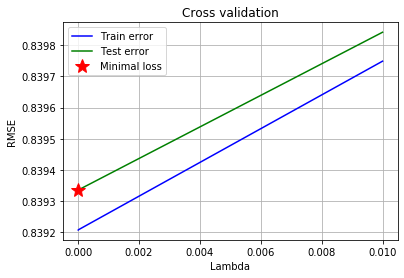

In [15]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import *

w_initial = np.random.rand(num_features)
lambdas = np.logspace(-500, -2, 50)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]


plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

### Polynomial regression

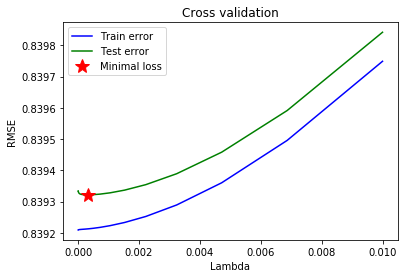

Degree=1 Best value of lambda = 0.0003393221771895323 
 Loss = 0.8393214845410194 
 Weights = [-0.31444828  0.02933596 -0.25772101 -0.25653846 -0.02965663  0.26884913
 -0.03599265  0.02324511 -0.18759333  0.12682796  0.19160397 -0.0008067
 -0.00090066  0.28514728 -0.00088807  0.00225491  0.12501793  0.00083586
 -0.07493441  0.06335189  0.06750858 -0.0156721  -0.01464499 -0.08054786]


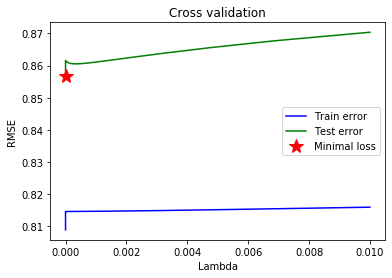

Degree=2 Best value of lambda = 1e-10 
 Loss = 0.8566511611799936 
 Weights = [-1.71076354e-01  4.65407369e-02 -2.50797636e-01 -2.48456980e-01
  1.29285944e-01  2.75966391e-01 -2.68413939e-02 -1.86324780e+01
 -1.96179095e-01  5.87928125e-02  3.82704874e+00 -6.96716601e-04
  6.19831381e-04  3.80642856e+00  9.45023000e-04 -8.12968149e-05
  5.29115474e-02  1.15498322e-03 -5.34286025e-02  3.64853875e-01
  4.26744823e-01 -1.55040540e+03  1.54987349e+03  1.57992830e+01
 -1.71006241e-01  1.80004017e-02  3.37120719e-02  7.63754243e-03
  1.76544781e-03 -6.26813553e-02  4.29417760e-03 -7.20692035e-03
  1.88415435e-02  6.30418722e-02 -1.48443147e-02 -3.53774368e-02
 -2.48067048e-02 -2.02841311e-02 -6.57134403e-02 -3.16705235e-02
 -5.81404330e-03 -2.43614198e-02 -2.23491801e-02 -2.06782710e-01
 -1.76929197e-01  9.50198151e+02 -9.49633584e+02  1.45167112e-02]


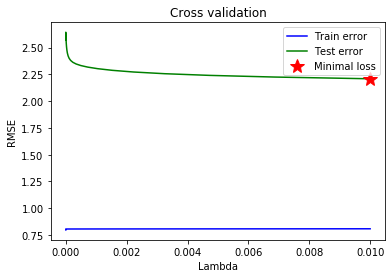

Degree=3 Best value of lambda = 0.01 
 Loss = 2.2086635202454064 
 Weights = [-3.61781475e-02  6.73385651e-02 -2.44956498e-01 -1.62091806e-01
  7.12540472e-02  1.58489199e-01 -4.31673004e-02  1.26663571e-01
 -1.37894253e-01 -1.68439383e-02  2.40332331e-01 -2.72979475e-03
 -3.92473021e-04  1.39209813e-01  2.64486592e-03  4.02574958e-03
  3.80461665e-02  7.59122657e-04 -3.21454810e-02  8.83460884e-02
 -2.07403114e-02 -2.32298206e-02 -2.33091075e-02  6.32326250e-02
 -3.61781475e-02 -3.61781475e-02 -1.85338751e-02 -1.61620652e-02
  6.20714819e-02 -2.92394006e-03 -1.14235548e-02  7.27346179e-04
  2.96615551e-02 -1.77758984e-03 -6.41791669e-02  2.27866380e-02
  1.35758660e-02 -2.94385267e-04  4.02610936e-04  2.81833942e-03
  3.19923291e-02 -1.50682730e-03  5.34124398e-02  6.84927804e-02
 -4.00761798e-02  1.11936338e-03 -3.66059190e-02  1.07281143e-03
 -2.67722100e-03  1.76375930e-04 -2.80479131e-02  1.08843607e-03
 -6.66228788e-02 -9.93771017e-04 -1.96978298e-03 -1.84012684e-03
 -4.78753874e

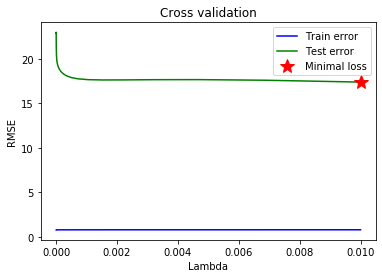

Degree=4 Best value of lambda = 0.01 
 Loss = 17.376085582802748 
 Weights = [-2.58297702e-02  9.96764251e-02 -2.47876805e-01 -7.22970266e-02
  4.81754011e-02  1.33696280e-01 -4.56678114e-02  1.31592679e-01
 -1.25078358e-01 -5.42270716e-03  2.38020431e-01 -3.31044180e-03
  1.88557437e-04  1.06824602e-01  3.22977927e-03  4.15573044e-03
  4.95107539e-02  1.43706254e-03 -3.34249503e-02  4.43230572e-02
 -1.46576770e-02 -2.39793576e-02 -2.40555804e-02  7.68704214e-02
 -2.58297702e-02 -2.58297702e-02 -2.58297702e-02  1.49125549e-02
 -4.89273758e-02 -1.71493223e-02  4.95450245e-02 -2.27251535e-04
 -1.38042768e-04 -7.37128342e-02  8.74944958e-03 -2.18621396e-04
  4.86126630e-02 -1.11293842e-02  6.99205862e-04 -6.33296452e-02
  1.26187794e-02  5.41278430e-03  2.17835392e-02 -1.40027567e-03
  1.83638590e-05  6.94772468e-03  6.57885179e-03 -5.73535771e-04
  5.52752030e-02 -6.63683647e-03  1.99572779e-04  1.59773204e-02
  5.76746965e-02  2.91760896e-02 -6.81222149e-02  5.02564001e-03
 -9.69445278e

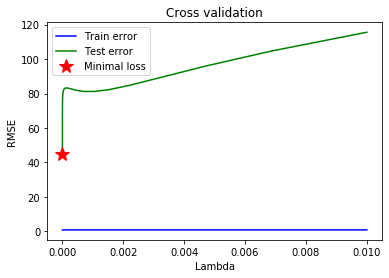

Degree=5 Best value of lambda = 1e-10 
 Loss = 44.805295440871255 
 Weights = [ 5.60477735e+01  1.07948346e+01 -2.76960715e-01 -2.67653077e-01
  2.26360087e-02  1.03073299e-01 -3.18574488e-02 -1.83845645e+01
 -6.79427377e-02 -1.84825886e-01  3.88891536e+00 -2.53762528e-03
 -1.72546983e-03  3.64024339e+00  2.74014610e-03  8.40999015e-03
  4.93208768e-02 -5.57095557e-04 -5.30453008e-02 -8.17117423e+00
  8.31680284e+00 -2.49063443e+02 -5.69719532e+00  1.57841410e+01
  5.61208319e+01  5.61318888e+01  5.61197102e+01  5.61197825e+01
 -1.24541175e+01  1.98821050e+00  2.35667660e+00 -7.24305076e-01
  1.76486535e-02  2.34959911e-02 -3.51773465e-03  1.28447506e-04
 -1.24717670e-02  9.06111528e-03 -6.56231557e-04  1.27735413e-05
  6.79710447e-02 -3.21060114e-02  5.20491414e-03 -2.68270412e-04
 -6.99039872e-02  3.31298840e-02  1.03137067e-02 -2.60408424e-03
  1.22334219e-02  2.05605485e-04 -1.30054465e-04  4.75135873e-06
  1.25563314e-01 -2.67825183e-02  2.60186966e-03 -9.48207108e-05
  6.54073318

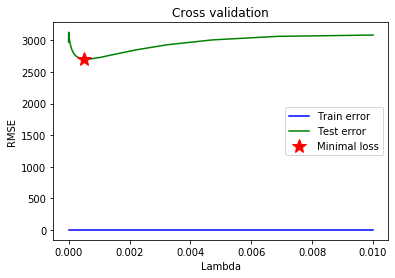

Degree=6 Best value of lambda = 0.0004941713361323828 
 Loss = 2704.863387354238 
 Weights = [-5.54824673e-02  1.28107137e+00 -3.49108024e-01 -1.27479850e-01
 -1.34562328e-02  1.09403645e-01 -3.84202002e-02  1.96998938e-01
 -4.63591079e-02 -9.97086532e-02  2.92781334e-01 -2.62811038e-03
 -4.24564325e-03  6.52018115e-02  2.13371171e-03  2.59720594e-03
  1.15823710e-01 -3.26619082e-03 -5.78013601e-02  5.78633466e-03
 -2.61234159e-02 -4.65748191e-02 -4.02078076e-02  1.50938064e-01
 -5.54824590e-02 -5.54823938e-02 -5.54823870e-02 -5.54823870e-02
 -5.54823870e-02 -7.59077732e-02 -7.26454219e-01 -2.70585205e-02
  8.29901813e-02  6.76511675e-03  9.87307995e-04  5.54875997e-02
 -1.24089308e-02  9.53533709e-04 -2.44044398e-05 -1.82370415e-01
  5.09083621e-02 -4.60701434e-03  1.68772920e-04 -2.16285871e-06
  6.73900466e-02 -3.65683763e-02  7.48537527e-03 -6.78483789e-04
  2.21558832e-05 -3.06096023e-02  2.00379383e-02  4.75116413e-03
 -3.59953292e-03  6.40037396e-04  9.40916651e-03  3.11882076e-

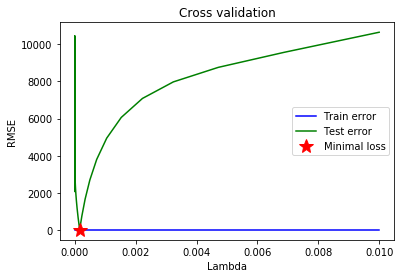

Degree=7 Best value of lambda = 0.00015998587196060574 
 Loss = 16.483666014024486 
 Weights = [-8.76268787e-02  2.41438334e+00 -3.82945445e-01 -1.52344725e-01
 -1.11644411e-02  1.19086271e-01 -3.63619634e-02  2.06426846e-01
 -2.65853473e-02 -1.18039814e-01  3.01003799e-01  6.53579463e-03
 -1.08275691e-03  3.60083716e-02  3.83331139e-03  2.15081844e-03
  1.34225876e-01  3.55193095e-03 -5.79037613e-02 -5.23640018e-03
  1.03397789e-02 -1.08398581e-01 -6.59378792e-02  1.66780196e-01
 -8.76224249e-02 -8.76268906e-02 -8.76268895e-02 -8.76268914e-02
 -8.76268883e-02 -8.76268882e-02 -4.58501058e-01 -1.30387030e+00
 -3.43841159e-01  4.33191585e-01  8.25848243e-02 -5.03430527e-02
  1.36806629e-02  7.88194492e-02 -2.42723845e-02  2.90506779e-03
 -1.55197153e-04  3.07792162e-06 -1.62398200e-01  4.71049833e-02
 -3.88024090e-03  8.44767534e-05  1.95372936e-06 -6.77904020e-08
  5.43371087e-02 -5.37137309e-02  2.53243013e-02 -5.66838261e-03
  5.69735851e-04 -2.07623912e-05  3.87981459e-02 -1.63059979

In [ ]:
from cross_validation import cross_validation
from cost import compute_loss_rmse

w_initial = np.random.rand(num_features)
degrees = 8
lambdas = np.logspace(-10, -2, 50)
k_fold = 4
seed = 6

Lambdas_star = []
Loss = []
Weights = np.zeros((num_features*degree, degrees))

for indices, degree in enumerate(range(1, degrees+1)):
    
    # prepare storage of the mean of the weights and rmse for train and test data
    ws = np.zeros((num_features*degree, len(lambdas)))
    rmse_train = []
    rmse_test = []

    for ind, lambda_ in enumerate(lambdas):
        # prepare storage of weights and rmse for train and test data for each fold
        ws_tmp = np.zeros((num_features*degree, k_fold))
        rmse_tr = []
        rmse_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            tx_tr, y_train, tx_te, y_test = cross_validation(y, tx, k, k_fold, seed)
            #form data with polynomial degree
            tx_train = build_poly_all_features(tx_tr, degree)
            tx_test = build_poly_all_features(tx_te, degree)
            #ridge regression
            w,_ = ridge_regression(y_train, tx_train, lambda_)
            # store weights and rmse for train and test data for each fold
            ws_tmp[:, i] = w
            rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
            rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
        # store the mean of the weights and rmse for train and test data
        ws[:, ind] = np.mean(ws_tmp, 1)
        rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))

    loss = np.amin(rmse_test)
    weights = ws[:, np.argmin(rmse_test)]
    lambda_star = lambdas[np.argmin(rmse_test)]

    plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
    print("Degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
        d=degree, g=lambda_star, l=loss, we = weights))
    
    Lambdas_star.append(lambda_star)
    Loss.append(loss)

degree_star =  degrees[np.argmin(Loss)]      
Loss_star = np.amin(Loss)
Lambda_star = Lambdas_star[np.argmin(Loss)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, l=Loss_star, we = Weights_star))

## Generate predictions and save ouput in csv format for submission:

In [20]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test = np.delete(tX_test, indices, axis=1)
_, tx_test = build_model_data(tX_test,ytest)

In [21]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(Weights_star, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)